# Tarea 1
La base de datos “ejercicios_Guatemala” adjunta contiene información socioeconómica para 1,086 hogares distribuidos en los 22 departamentos y 8 regiones administrativas de Guatemala. Estos hogares corresponden a una sub-muestra aleatoria equivalente al 10% de la muestra total de la ENCOVI 2014. Esta base está en formato Excel e incluye un listado con los nombres de las variables, su descripción general, códigos y etiquetas. Para las estimaciones que se piden más adelante pueden trabajar con la base desde Excel o importarse en Stata o R:


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pl

In [4]:
datos = pd.read_stata("../models/ejercicios_Guatemala.dta")
datos.head()

c:\users\hagarcia\pycharmprojects\microsimulaciones\venv\lib\site-packages\pandas\io\stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,REGION,DEPTO,AREA,THOGAR,P01A02,P01A03,P01A04,P01A05A,P01A05B,P01A05C,...,P01H02,P01H03,P01H04,P01H05,P01H06,P01H07,P06B25A,P06B25B,GPOETNICO,INGTOT
0,I. METROPOLITANA,Guatemala,Urbana,4.0,Block,Lamina metalica,Ladrillo de cemento,Si,Si,Si,...,No,No,No,No,No,No,Basico,2.0,No indigena,12499.166992
1,I. METROPOLITANA,Guatemala,Urbana,4.0,Block,Concreto,Torta de cemento,Si,Si,Si,...,No,No,No,No,No,No,Primaria,6.0,No indigena,8328.000000
2,I. METROPOLITANA,Guatemala,Urbana,5.0,Ladrillo,Concreto,Ladrillo ceramico,Si,Si,Si,...,No,No,No,No,No,No,Primaria,3.0,No indigena,3200.000000
3,I. METROPOLITANA,Guatemala,Urbana,1.0,Block,Lamina metalica,Torta de cemento,Si,Si,Si,...,No,No,No,No,No,No,Primaria,6.0,No indigena,2430.666748
4,I. METROPOLITANA,Guatemala,Urbana,2.0,Block,Concreto,Ladrillo ceramico,Si,Si,Si,...,No,No,No,No,No,No,Diversificado,6.0,No indigena,9625.000000


## A. Medición de la pobreza
1. Factores a considerar:
     1. La unidad de análisis es el hogar (una observación por hogar, para un total de 1,086 hogares).
     2. El principal atributo del bienestar en este ejercicio es el ingreso.
     3. Para la etapa de identificación, los valores del ingreso están contenidos en la variable INGTOT correspondiente al ingreso total del hogar.
     4. La línea de pobreza a utilizar está expresada en términos per cápita y toma el siguiente valor: Q850.
     5. Para la etapa de agregación, utilice la familia de índices FGT con valores de 𝛼 de 0 (incidencia), 1 (intensidad) y 2 (severidad).
2. Con estos factores y la información de la base de datos:
    1. Exprese el ingreso total del hogar en términos per cápita
    2. Compare el ingreso per cápita de cada hogar con la línea de pobreza y calcule la incidencia de pobreza para el total de 1,086 hogares (por practicidad y para fines ilustrativos nos referiremos a esta sub-muestra como “total del país”)
    3. Calcule la incidencia de pobreza para cada región, departamento, y área, así como por etnicidad del jefe o jefa de hogar. Contraste estos resultados con la incidencia para el total del país (puede apoyarse en gráficos). ¿En qué regiones, departamentos, o áreas la incidencia de pobreza es más alta que el país? ¿En qué hogares la incidencia es mayor/menor?

0       0
1       0
2       1
3       0
4       0
       ..
1081    1
1082    0
1083    1
1084    0
1085    0
Name: Pobreza, Length: 1086, dtype: int32


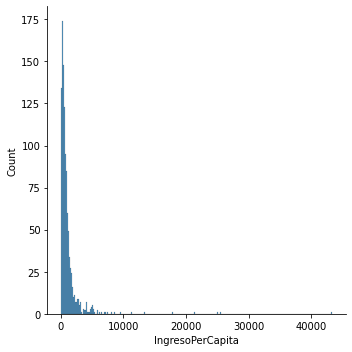

In [16]:
linea_pobreza = 850
datos["IngresoPerCapita"] = datos['INGTOT']/datos["THOGAR"]
sb.displot(datos, x = "IngresoPerCapita")
datos["Pobreza"] = np.where(datos['IngresoPerCapita'] <850,1,0)
datos["Pobreza"] = np.where(datos['IngresoPerCapita'] <850,1,0)

Para calcular la incidencia de la pobreza usamos la fórmula: $$H = \frac{q}{n} $$, donde $q$ es la cantidad total de personas
en condición de pobreza y $n$ es el total de la población.

In [27]:
q = datos.value_counts("Pobreza")[1]
n = datos.shape[0]
H = q / n
print(H)
print(datos.info())

0.6528545119705341
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   REGION            1086 non-null   category
 1   DEPTO             1086 non-null   category
 2   AREA              1086 non-null   category
 3   THOGAR            1086 non-null   float64 
 4   P01A02            1086 non-null   category
 5   P01A03            1086 non-null   category
 6   P01A04            1086 non-null   category
 7   P01A05A           1086 non-null   category
 8   P01A05B           1086 non-null   category
 9   P01A05C           1086 non-null   category
 10  P01A06            1086 non-null   float64 
 11  P01D06            1086 non-null   category
 12  P01D17            1086 non-null   category
 13  P01D19B           1086 non-null   category
 14  P01D21            1086 non-null   category
 15  P01D27            1086 non-null   category
 16  P01H0

In [51]:
variables = ["REGION", "DEPTO", "AREA", "GPOETNICO"]
resultados = []
for v in variables:
    q = datos.groupby(["Pobreza",v])[v].count()[1]
    n = datos.value_counts(v)
    resultados.append(q/n)

REGION
I. METROPOLITANA      0.244681
II. NORTE             0.842857
III. NORORIENTAL      0.615894
IV SURORIENTAL        0.758621
V. CENTRAL            0.555556
VI. SUROCCIDENTAL     0.693380
VII. NOROCCIDENTAL    0.873563
VIII. PETEN           0.722222
dtype: float64
<class 'pandas.core.series.Series'>
DEPTO
Guatemala         0.244681
El Progreso       0.625000
Sacatepéquez      0.445783
Chimaltenango     0.760870
Escuintla         0.550725
Santa Rosa        0.580645
Sololá            0.795455
Totonicapán       0.800000
Quetzaltenango    0.651163
Suchitepéquez     0.586207
Retalhuleu        0.709677
San Marcos        0.727273
Huehuetenango     0.894737
Quiché            0.857143
Baja Verapaz      0.742857
Alta Verapaz      0.942857
Petén             0.722222
Izabal            0.581395
Zacapa            0.529412
Chiquimula        0.735294
Jalapa            0.843137
Jutiapa           0.777778
dtype: float64
<class 'pandas.core.series.Series'>
AREA
Urbana    0.467641
Rural     0.799012


<AxesSubplot:xlabel='REGION'>

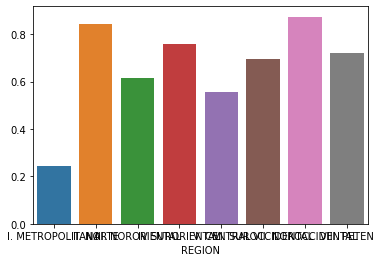

In [52]:
sb.barplot(x = resultados[0].index, y = resultados[0])
